# 4.2 Extracció de Keypoints: SIFT, SURF, HOG

## Keypoints
Els Keypoints o punts característics o punts d'interès d’una imatge són aquells punts que són fàcilment diferenciables en una imatge i que ens permeten identificar-los en imatges iguals o similars a les quals se’ls ha aplicat alguna transformació com escalatge, rotacions, etc.

Són punts importants quant a la informació de l’entorn que representen, però també estables quant a transformacions locals i globals de la imatge.

Si els Blobs eren _regions_ de la imatge d’especial interès, els Keypoints són els _punts d’interès_ de la imatge, la majoria de vegades també són part d’un Blob o del seu límit. Són considerats un subconjunt dels Blobs o un submètode de la detecció de Blobs. La idea és que no importa com i quant canviï una imatge, pot escalar-se, rotar-se, traslladar-se o distorsionar-se, però els mètodes de detecció dels keypoints trobaran els mateixos en tots els casos.


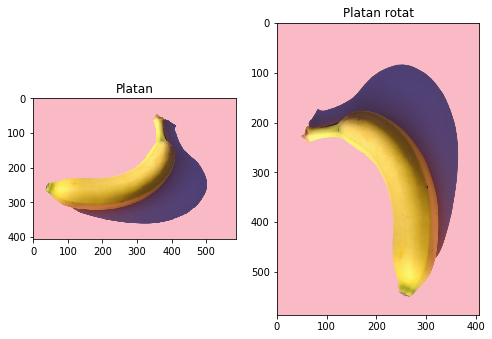

In [5]:
#EXEMPLE PRÀCTIC: detecció keypoints en dues imatges iguals però amb diferent orientació (una està rotada 90 graus)
#RIQUI: pots fer servir imatge plàtan sobre fons rosa, l’he retallat i baixat molt de qualitat, si no et va bé encara tinc originals
import cv2
from matplotlib import pyplot as plt

platan = cv2.imread('Imatges/Platan.png')
platan_rgb = cv2.cvtColor(platan, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.title('Platan')
plt.imshow(platan_rgb)

platan_rotat = cv2.imread('Imatges/Platan-rotat.png')
platan_rotat_rgb = cv2.cvtColor(platan_rotat, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.title('Platan rotat')
plt.imshow(platan_rotat_rgb)

fig = plt.gcf()
fig.set_size_inches(8, 12)




Existeixen diversos mètodes de detecció o extracció de Keypoints, però hem de tenir en compte que la majoria només ens dóna informació de la seva posició en la imatge, és a dir, les seves coordenades, la qual cosa no és suficient per establir una relació entre ells, ni per veure si són semblants o molt diferents entre ells. Per aconseguir aquesta informació, necessitem els **descriptors** dels keypoints, perquè ells són els que en donen una manera de comparar els keypoints entre sí.

Imaginem que tenim dues imatges iguals on una és una còpia de l’altra però traslladada nomes uns píxels a la dreta respecte la primera. Si només tinguéssim els Keypoints, tot i ser exactament els mateixos perquè són dues imatges iguals, com veuríem només la posició els identificaríem com keypoints diferents i, per tant, com imatges diferents. I ens passaria el mateix si una imatge fos el doble de l’altra. Els descriptors seran els que ens permetran _comparar_ keypoints de diferents imatges i detectar-los com iguals.

Anem a veure un exemple.


In [ ]:
#EXEMPLE PRÀCTIC: càlcul descriptors (i visualització?) i matching de keypoints 
# RIQUI: entre les dues imatges anteriors.


Els descriptors desen informació relativa al keypoint en format numèric en una variable tipus vector. D’aquesta manera comparar keypoints es redueix a comparar vectors numèrics, la qual cosa es pot fer de diverses maneres però una simple distància euclídea pot ser més que suficient per la majoria dels casos.

Els descriptors han de complir unes característiques bàsiques:
- Han de ser independents de la posició del keypoint: és a dir que si movem la imatge i extraiem el mateix keypoint, el descriptor ha de ser el mateix.
- Han de ser robusts a les transformacions d’imatge: canvis en el contrast (mateixa imatge amb sol o sense sol), o canvis en la perspectiva de l’objecte haurien de donar els mateixos descriptors.
- Han de ser independents a l’escalatge de la imatge.

Com ja hem comentat, hi ha molts algoritmes per extreure Keypoints, molts d’ells es basen només en la detecció de cantonades perquè són més fàcils de trobar i són invariants a les rotacions, però en molts casos no són invariants a l’escalatge. Nosaltres, en aquest curs, veurem alguns algoritmes que van més enllà i aconsegueixen localitzar característiques invariants a les rotacions, l’escalatge, canvis en la il·luminació i en els punts de vista. Comencem per l’algoritme SIFT.

## SIFT
SIFT és l’acrònim del seu nom en anglès Scale Invariant Feature Transform i és un algoritme de localització i descripció de keypoints que va ser publicat per primer cop el 1999 (i patentat el 2004).

Està basat en el càlcul dels gradients dels píxels i els seus veïns, el que permet localitzar i identificar el mateix keypoint en diverses imatges independentment de la rotació i escala aplicada.

El procés per detectar-los segueix els següents passos:
1. Crear un espai a escala: Es difumina i remodela la imatge amb diferents amplades de difusió i taxes de mostreig per crear un espai a escala. A la imatge original se li aplica diferents nivells de difuminació (recomanen 5 nivells) i diferents nivells d’escalatge (recomanen uns 4), és a dir que es creen diferents representacions internes de la imatge original. (La imatge original es difumina diverses vegades, es re-escala a la meitat del tamany i es tornen a aplicar els nivells de difuminació, es torna a escalar a la meitat del tamany, etc. ). Cada grup d’imatges del mateix tamany però amb difuminació diferent s’anomena octava.
2. Invariància escalar: Per cada parell d’imatge d’una mateixa octava, es calcula la Diferència de Gaussianes (DoG en anglès), i a partir d’aquí es calculen els màxims i mínims comparant els píxels d’una imatge amb la corresponent de l’anterior i posterior octava. Com a resultat detectarem blobs a diferents escales. El centre del blob es converteix en un keypoint donada una escala, x i y. 
3. Invariància rotacional: Assignar a cada keypoint una orientació calculant l’histograma de les orientacions del gradient per a cada píxel i els seus veïns, i escollint aquell que tingui més importància o prominència (el que tingui més aparicions).
4. Identificació única de cada keypoint: Assignar a cada keypoint un vector de característiques de 128 dimensions basat en les orientacions dels gradients dels píxels i els seus 16 veïns locals. Aquest identificador únic també es coneix com fingerprint del keypoint.


In [ ]:
#EXEMPLE PRÀCTIC: APLICANT SIFT PER DETECTAR I FER MATCHING DE KEYPOINTS 
# EN IMATGES IGUALS PERÒ ESCALADES I/O ROTADES.

El mètode SIFT permet identificar els mateixos objectes o punts d’interès en diferents imatges independentment de l’escala, la rotació, la il·luminació i el punt de vista. Funciona molt bé, però és un algoritme patentat, el que vol dir que el podem fer servir amb finalitats acadèmiques, però no per finalitats comercials a no ser que s’arribi a un acord amb els autors.

## SURF
SURF ve del seu acrònim en anglès Speeded-Up Robust Features, va ser creat després de l’algoritme de SIFT, en el 2006, amb la intenció de millorar la velocitat i rendiment d’aquest últim. Igual que SIFT, aquest també és un algoritme patentat per a la detecció i descripció de keypoints en una imatge.

SURF millora cadascun dels passos de l’algoritme de SIFT, per exemple utilitza convolució amb Box Filter enlloc de calcular les DoG, el mètode de la determinant de Hessian per detectar blobs, les respostes horitzontals i verticals a les ones de Harr per calcular l’orientació dominant i, finalment, desa els descriptors resultants en un vector de 64 dimensions. L’algoritme és 3 vegades més ràpid que el SIFT i, tot i així, continua sent robut en la majoria de situacions d’escalatge i rotació, tot i que no és tant bo com el SIFT per canvis en il·luminació i punts de vista.


In [ ]:
# EXEMPLE PRÀCTIC: APLICANT MÈTODE DE SURF I SIFT A IMATGES ROTADES I AMB CANVI D’IL·LUMINACIÓ PER 
# COMPARAR RESULTATS (o comparar resultats del matching amb imatge original)


## HOG
L’algoritme HOG (del seu nom en anglès Histogram of Oriented Gradients) es va fer popular al 2005, tot i que es van publicar i patentar alguns dels seus conceptes molt abans, a finals dels 90. En aquest algoritme, la distribució de la orientació dels gradients és el que es fa servir com característiques.

Els gradients s’utilitzen per analitzar funcions i veure com varien i es comporten al llarg del seu domini. 

El gradient en un punt d’una funció real de diverses variables reals, és el conjunt ordenat de les derivades parcials d’aquesta funció en aquest punt. Aquest conjunt ordenat és el vector gradient, el qual té una magnitud (mòdul) i una direcció associada. La direcció del vector gradient indica l’angle o direcció en el qual la funció  varia més ràpidament, mentre que el mòdul representa el ritme de variació o la intensitat del canvi (a valor més elevat, ritme més accelerat o canvi més pronunciat).

Es pot calcular l’aproximació al gradient a través de la convolució amb l’operador Sobel, el qual utilitza dues matrius 3x3 (kernels), una per calcular els canvis horitzontals i l’altre pels canvis verticals. Si definim A com la imatge original, i Gx i Gy com les aproximacions horitzontals i verticals de les derivades de intensitat, el seu càlcul amb les matrius Sobel és com segueix:

[formula 1]

I en cada punt de la imatge, un cop tenim el resultat d’aplicar les aproximacions dels gradients horitzontal i vertical, podem combinar-los per obtenir la magnitud i la direcció del gradient:

[formula 2]

Aquestes operacions es realitzen per cada píxel, el que ens donarà per cada block de 64 píxels (8x8) un resultat de 64 vectors gradients. Aquest resultat es comprimeix en 9 vectors, creant un histograma de vectors gradient on l’eix de les x són els possibles valors de la direcció (mostrejats en blocs de 20 graus), i l’eix de les y són els valors de les possibles magnituds.



In [ ]:
#EXEMPLE PRÀCTIC: CALCULAR I MOSTRAR ELS GRADIENTS HORITZONTALS I VERTICAL D’UNA IMATGE, AIXÍ COM LA 
# COMBINACIÓ DELS DOS AMB MÈTODE HOG (o matrius SOBEL)




Teoria:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html

Harris

https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

També 
    

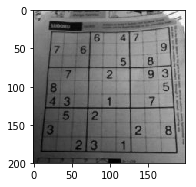

interactive(children=(Dropdown(description='blocksize', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [2]:
# EXERCICI: Detecció de contorns amb diferents matrius de convolució

import cv2
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


im = cv2.imread('Imatges/sudoku.jpg', cv2.IMREAD_GRAYSCALE)
gray = np.float32(im)

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')

@interact
def harris_parameters(blocksize=range(1, 25), ksize=range(3, 31, 2)):
    dst = cv2.cornerHarris(gray,blocksize,ksize,0.01)
    plt.subplot(1,2,2)
    plt.imshow(dst, cmap='gray')
    fig = plt.gcf()
    fig.set_size_inches(15.5, 15.5)
    
    

## Referències
1. Contorns
 - Contours : Getting Started: [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html#contours-getting-started](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html#contours-getting-started)
 - Contours in OpenCV: [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html#table-of-content-contours](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html#table-of-content-contours)
 - Contour Features: [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html#contour-features](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html#contour-features)
 - Contour Properties: [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html#contour-properties](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html#contour-properties)
 - Valverde-Rebaza, Jorge. (2007). Detección de bordes mediante el algoritmo de Canny. [https://www.researchgate.net/publication/267240432_Deteccion_de_bordes_mediante_el_algoritmo_de_Canny](https://www.researchgate.net/publication/267240432_Deteccion_de_bordes_mediante_el_algoritmo_de_Canny)

2. SIFT
 - Un bon tutorial de SIFT: SIFT: Theory and Practice [http://www.aishack.in/tutorials/sift-scale-invariant-feature-transform-introduction/](http://www.aishack.in/tutorials/sift-scale-invariant-feature-transform-introduction/)

3. SURF
 - Introduction to SURF (Speeded-Up Robust Features): [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html)

4. HOG
 - Histogram of Oriented Gradients: [https://www.learnopencv.com/histogram-of-oriented-gradients/](https://www.learnopencv.com/histogram-of-oriented-gradients/)
 - Operador Sobel en la Wiki: [https://es.wikipedia.org/wiki/Operador_Sobel](https://es.wikipedia.org/wiki/Operador_Sobel)
 - Video explicatiu algoritme HOG pas a pas, Centre Recerca Visió per Computador, Universitat de Florida Centre: [https://www.youtube.com/watch?v=0Zib1YEE4LU](https://www.youtube.com/watch?v=0Zib1YEE4LU)

